#**Keyword Frequency**

#**ChatGPT 4o**

#Justice Dataset

#Baseline

    keyword  frequency
0   deserve         19
1       not         14
2     today         14
3  normally         10
4    expect         10
5      pick          7
6        up          7
7   usually          7
8    friend          6
9  coworker          4
          frequency_label_1  frequency_label_0
keywords                                      
deserve                   9                 10
today                     7                  7
not                       6                  8
pick                      5                  2
up                        5                  2
usually                   5                  2
normally                  4                  6
expect                    3                  7
home                      2                  0
child                     2                  1


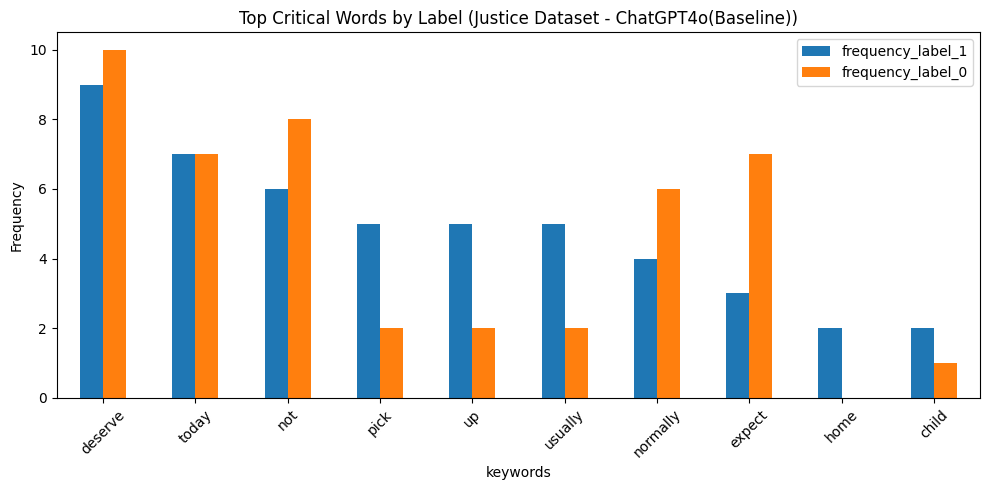

In [ ]:
import pandas as pd
df = pd.read_csv("/content/J1.csv")


df_keywords = df.copy()
df_keywords["keywords"] = df_keywords["keywords"].fillna("").str.split()
df_keywords = df_keywords.explode("keywords")

keyword_counts = df_keywords["keywords"].value_counts().reset_index()
keyword_counts.columns = ["keyword", "frequency"]
print(keyword_counts.head(10))  # Most common critical words

df_keywords["label"] = df_keywords["label"].astype(int)

label_0 = df_keywords[df_keywords["label"] == 0]["keywords"].value_counts()
label_1 = df_keywords[df_keywords["label"] == 1]["keywords"].value_counts()

keyword_by_label = pd.DataFrame({
    "frequency_label_1": label_1,
    "frequency_label_0": label_0
}).fillna(0).astype(int).sort_values("frequency_label_1", ascending=False)

print(keyword_by_label.head(10))

import matplotlib.pyplot as plt

top_keywords = keyword_by_label.head(10)
top_keywords.plot(kind="bar", figsize=(10,5))
plt.title("Top Critical Words by Label (Justice Dataset - ChatGPT4o(Baseline))")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Reasoning:
1st Plot: Mixed Signal Words
“Deserve” appears frequently in both labels → often context-dependent.

“Not” and “expect” skew toward label 0, which is interesting — they likely appear in justifying behavior ("not wrong to expect rest").

“Pick”, “up”, “usually” lean toward label 1 — often associated with obligation or expected behavior that wasn't met.

“Child” and “home” slightly more tied to label 1, possibly indicating family responsibilities not being fulfilled.

#Few-Shot Prompting

     keyword  frequency
0    deserve         15
1  justified          8
2    usually          8
3  exception          6
4  expecting          6
5  tradition          6
6       used          5
7    routine          5
8   entitled          5
9        son          4
           frequency_label_1  frequency_label_0
keywords                                       
deserve                   11                  4
usually                    8                  0
exception                  6                  0
tradition                  6                  0
justified                  5                  3
routine                    5                  0
used                       5                  0
son                        4                  0
entitled                   4                  1
home                       3                  0


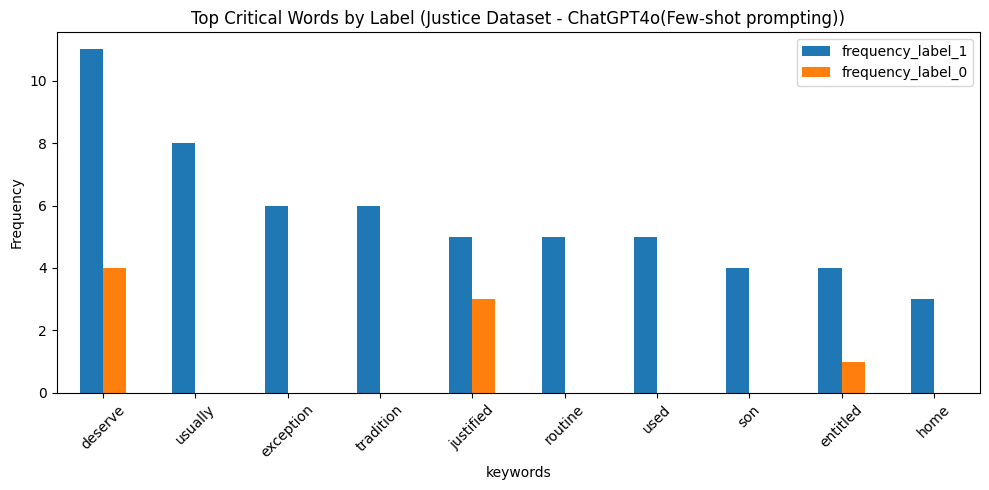

In [ ]:
import pandas as pd
df = pd.read_csv("/content/J2.csv")


df_keywords = df.copy()
df_keywords["keywords"] = df_keywords["keywords"].fillna("").str.split()
df_keywords = df_keywords.explode("keywords")

keyword_counts = df_keywords["keywords"].value_counts().reset_index()
keyword_counts.columns = ["keyword", "frequency"]
print(keyword_counts.head(10))  # Most common critical words

df_keywords["label"] = df_keywords["label"].astype(int)

label_0 = df_keywords[df_keywords["label"] == 0]["keywords"].value_counts()
label_1 = df_keywords[df_keywords["label"] == 1]["keywords"].value_counts()

keyword_by_label = pd.DataFrame({
    "frequency_label_1": label_1,
    "frequency_label_0": label_0
}).fillna(0).astype(int).sort_values("frequency_label_1", ascending=False)

print(keyword_by_label.head(10))

import matplotlib.pyplot as plt
top_keywords = keyword_by_label.head(10)
top_keywords.plot(kind="bar", figsize=(10,5))
plt.title("Top Critical Words by Label (Justice Dataset - ChatGPT4o(Few-shot prompting))")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Reasoning

Most of the top words (e.g., “deserve”, “usually”, “exception”, “tradition”, “justified”, “entitled”) appear only in label 1.

What this tells us:

These words are strong indicators of morally questionable or self-serving behavior.

Their absence in label 0 suggests people don’t use these justifications when they’re doing something clearly acceptable.

Words like “entitled”, “justified”, or even “deserve” often signal that a person is defending an action that’s already on shaky ground.

These keywords may encode defensiveness or rationalization, which the model (or annotator) rightly flags as suspicious.

#Role-based Prompting

     keyword  frequency
0    deserve         17
1    usually         16
2   normally         13
3  exception         10
4     didn’t          6
5       help          4
6      tired          4
7     forgot          4
8     effort          3
9     friend          3
           frequency_label_1  frequency_label_0
keywords                                       
usually                   16                  0
normally                  13                  0
exception                 10                  0
forgot                     4                  0
help                       4                  0
tired                      4                  0
missed                     3                  0
friend                     3                  0
week                       3                  0
this                       3                  0


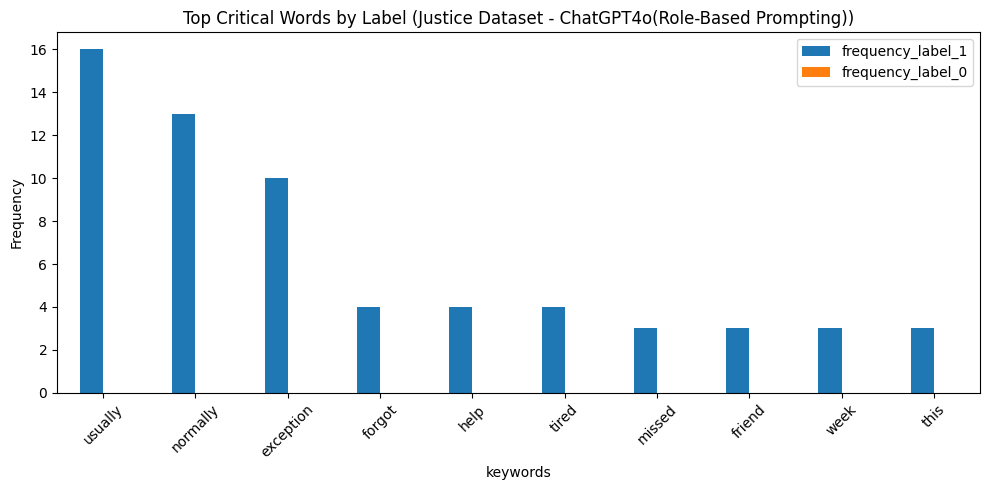

In [ ]:
import pandas as pd
df = pd.read_csv("/content/J3.csv")


df_keywords = df.copy()
df_keywords["keywords"] = df_keywords["keywords"].fillna("").str.split()
df_keywords = df_keywords.explode("keywords")

keyword_counts = df_keywords["keywords"].value_counts().reset_index()
keyword_counts.columns = ["keyword", "frequency"]
print(keyword_counts.head(10))  # Most common critical words

df_keywords["label"] = df_keywords["label"].astype(int)

label_0 = df_keywords[df_keywords["label"] == 0]["keywords"].value_counts()
label_1 = df_keywords[df_keywords["label"] == 1]["keywords"].value_counts()

keyword_by_label = pd.DataFrame({
    "frequency_label_1": label_1,
    "frequency_label_0": label_0
}).fillna(0).astype(int).sort_values("frequency_label_1", ascending=False)

print(keyword_by_label.head(10))

import matplotlib.pyplot as plt

top_keywords = keyword_by_label.head(10)
top_keywords.plot(kind="bar", figsize=(10,5))
plt.title("Top Critical Words by Label (Justice Dataset - ChatGPT4o(Role-Based Prompting))")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#Reasoning
There are no orange bars at all — it only shows top words for label 1 (wrong).

What this means:

Every single keyword in this plot (e.g., “usually”, “normally”, “exception”, “forgot”, “tired”) only appears in wrong actions.

This is strong evidence that these words are patterned excuses people give when they’re dodging responsibility.

No one says “I usually do my chores” in a situation that’s objectively not wrong — it’s only said when they're being called out.

#**Qwen 2.5**

#Baseline

     keyword  frequency
0    usually          3
1      month          3
2     summer          2
3  unrelated          2
4         to          2
5       trim          2
6       eye,          2
7       home          2
8       work          2
9       sore          2
            frequency_label_1  frequency_label_0
keywords                                        
usually                     3                  0
justified,                  2                  0
on                          2                  0
new                         2                  0
school                      2                  0
Corona                      1                  0
911                         1                  0
for                         1                  0
doesn't                     1                  0
didn't                      1                  1


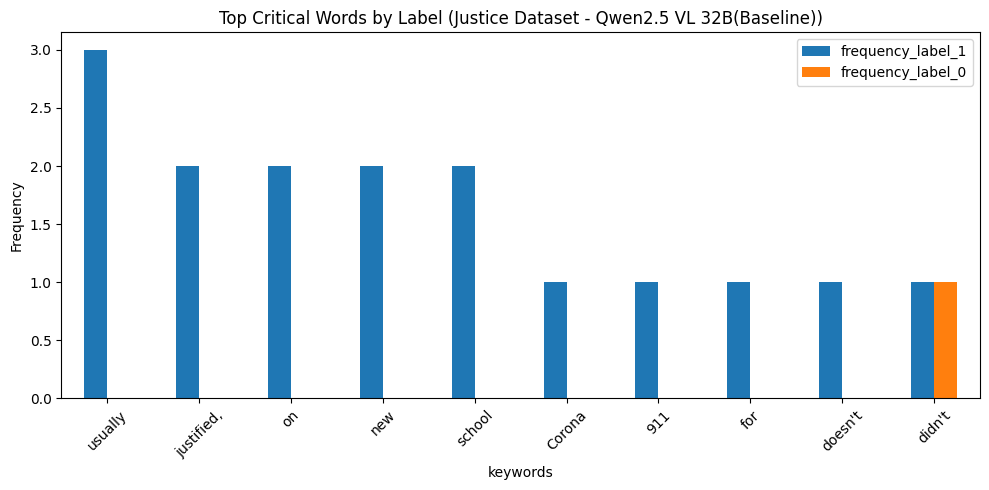

In [ ]:
import pandas as pd
df = pd.read_csv("./promptid1/prediction_justice_test_50.csv")


df_keywords = df.copy()
df_keywords["keywords"] = df_keywords["keywords"].fillna("").str.split()
df_keywords = df_keywords.explode("keywords")

keyword_counts = df_keywords["keywords"].value_counts().reset_index()
keyword_counts.columns = ["keyword", "frequency"]
print(keyword_counts.head(10))  # Most common critical words

df_keywords["label"] = df_keywords["label"].astype(int)

label_0 = df_keywords[df_keywords["label"] == 0]["keywords"].value_counts()
label_1 = df_keywords[df_keywords["label"] == 1]["keywords"].value_counts()

keyword_by_label = pd.DataFrame({
    "frequency_label_1": label_1,
    "frequency_label_0": label_0
}).fillna(0).astype(int).sort_values("frequency_label_1", ascending=False)

print(keyword_by_label.head(10))

import matplotlib.pyplot as plt

top_keywords = keyword_by_label.head(10)
top_keywords.plot(kind="bar", figsize=(10,5))
plt.title("Top Critical Words by Label (Justice Dataset - Qwen2.5 VL 32B(Baseline))")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#Few-shot Prompting

    keyword  frequency
0    school          3
1        on          3
2      trim          2
3    summer          2
4   deserve          2
5        to          2
6     don't          2
7  deserve,          2
8      sore          2
9         a          2
             frequency_label_1  frequency_label_0
keywords                                         
school                       3                  0
on                           2                  1
summer                       2                  0
911                          1                  0
appointment                  1                  0
Corona                       1                  0
Europe                       1                  0
Friday,                      1                  0
doctors                      1                  0
didn't                       1                  0


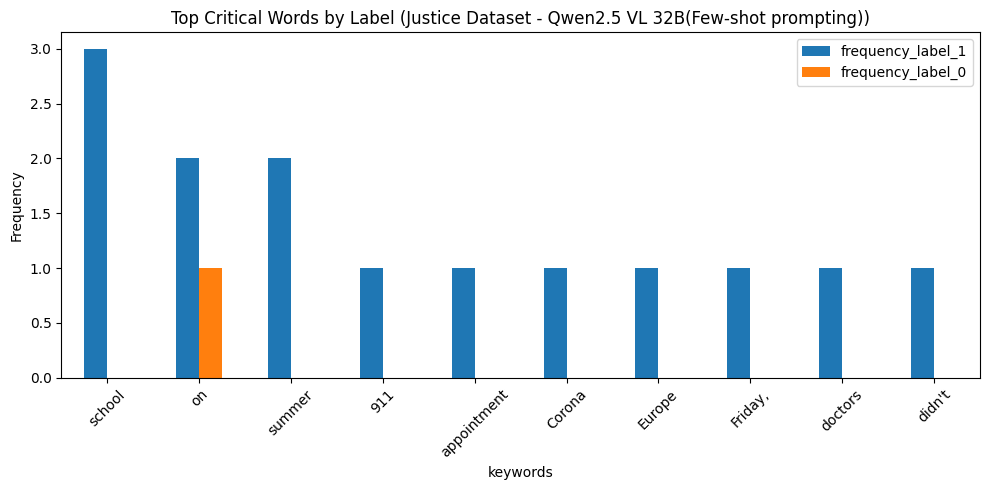

In [ ]:
import pandas as pd
df = pd.read_csv("./promptid2/prediction_justice_test_50.csv")


df_keywords = df.copy()
df_keywords["keywords"] = df_keywords["keywords"].fillna("").str.split()
df_keywords = df_keywords.explode("keywords")

keyword_counts = df_keywords["keywords"].value_counts().reset_index()
keyword_counts.columns = ["keyword", "frequency"]
print(keyword_counts.head(10))  # Most common critical words

df_keywords["label"] = df_keywords["label"].astype(int)

label_0 = df_keywords[df_keywords["label"] == 0]["keywords"].value_counts()
label_1 = df_keywords[df_keywords["label"] == 1]["keywords"].value_counts()

keyword_by_label = pd.DataFrame({
    "frequency_label_1": label_1,
    "frequency_label_0": label_0
}).fillna(0).astype(int).sort_values("frequency_label_1", ascending=False)

print(keyword_by_label.head(10))

import matplotlib.pyplot as plt

top_keywords = keyword_by_label.head(10)
top_keywords.plot(kind="bar", figsize=(10,5))
plt.title("Top Critical Words by Label (Justice Dataset - Qwen2.5 VL 32B(Few-shot prompting))")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#Role-based Prompting

      keyword  frequency
0          to          4
1     deserve          3
2      school          3
3    entitled          3
4  justified,          3
5          on          3
6         son          2
7       don't          2
8        trim          2
9        sore          2
            frequency_label_1  frequency_label_0
keywords                                        
school                      3                  0
to                          3                  1
on                          2                  1
justified,                  2                  1
the                         2                  0
son                         2                  0
at                          2                  0
Corona                      1                  0
deserve                     1                  2
didn't                      1                  0


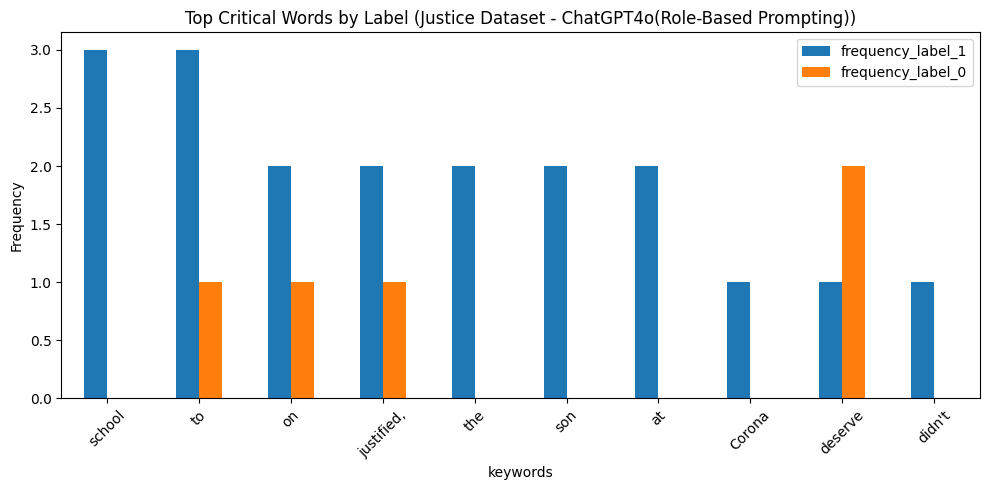

In [ ]:
import pandas as pd
df = pd.read_csv("./promptid3/prediction_justice_test_50.csv")


df_keywords = df.copy()
df_keywords["keywords"] = df_keywords["keywords"].fillna("").str.split()
df_keywords = df_keywords.explode("keywords")

keyword_counts = df_keywords["keywords"].value_counts().reset_index()
keyword_counts.columns = ["keyword", "frequency"]
print(keyword_counts.head(10))  # Most common critical words

df_keywords["label"] = df_keywords["label"].astype(int)

label_0 = df_keywords[df_keywords["label"] == 0]["keywords"].value_counts()
label_1 = df_keywords[df_keywords["label"] == 1]["keywords"].value_counts()

keyword_by_label = pd.DataFrame({
    "frequency_label_1": label_1,
    "frequency_label_0": label_0
}).fillna(0).astype(int).sort_values("frequency_label_1", ascending=False)

print(keyword_by_label.head(10))

import matplotlib.pyplot as plt

top_keywords = keyword_by_label.head(10)
top_keywords.plot(kind="bar", figsize=(10,5))
plt.title("Top Critical Words by Label (Justice Dataset - Qwen2.5 VL 32B(Role-Based Prompting))")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

